<a href="https://colab.research.google.com/github/2303A510H5/batch30/blob/main/31_10_2025_F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import brown
from nltk.tag import hmm
from sklearn.model_selection import train_test_split

# Download corpus
nltk.download('brown')
nltk.download('universal_tagset')

# Load tagged sentences
tagged_sents = brown.tagged_sents(tagset='universal')

# Split into train/test
train_sents, test_sents = train_test_split(tagged_sents, test_size=0.1, random_state=42)

# Train HMM tagger
trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_sents)

# Evaluate on test set
accuracy = hmm_tagger.evaluate(test_sents)
print(f"HMM Tagging Accuracy: {accuracy:.2%}")

# Show examples
for sent in test_sents[:3]:
    print("\nOriginal:", [word for word, tag in sent])
    print("True Tags:", [tag for word, tag in sent])
    print("Predicted:", [tag for word, tag in hmm_tagger.tag([word for word, _ in sent])])


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
/tmp/ipython-input-2811022975.py:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = hmm_tagger.evaluate(test_sents)
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


HMM Tagging Accuracy: 76.37%

Original: ['Open', 'market', 'policy']
True Tags: ['ADJ', 'NOUN', 'NOUN']
Predicted: ['ADJ', 'NOUN', 'NOUN']

Original: ['And', 'you', 'think', 'you', 'have', 'language', 'problems', '.']
True Tags: ['CONJ', 'PRON', 'VERB', 'PRON', 'VERB', 'NOUN', 'NOUN', '.']
Predicted: ['CONJ', 'PRON', 'VERB', 'PRON', 'VERB', 'NOUN', 'NOUN', '.']

Original: ['Mae', 'entered', 'the', 'room', 'from', 'the', 'hallway', 'to', 'the', 'kitchen', '.']
True Tags: ['NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', '.']
Predicted: ['NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', '.']


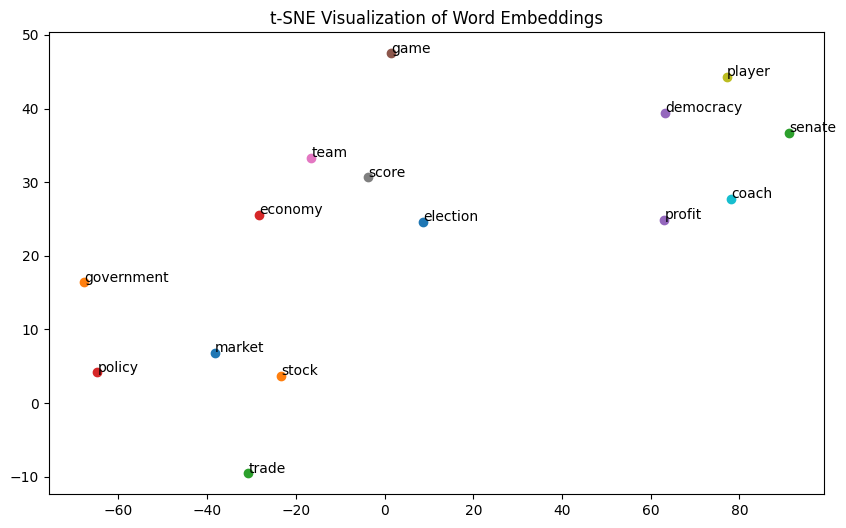

In [ ]:
import numpy as np
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare corpus
sentences = brown.sents()

# Train Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Select words by category
politics = ['election', 'government', 'senate', 'policy', 'democracy']
sports = ['game', 'team', 'score', 'player', 'coach']
business = ['market', 'stock', 'trade', 'economy', 'profit']

words = politics + sports + business

# Filter out words not in vocabulary
valid_words = [w for w in words if w in model.wv]
vectors = np.array([model.wv[w] for w in valid_words])  # ✅ Convert to NumPy array

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=5, learning_rate=100)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(valid_words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.1, reduced[i, 1]+0.1, word)
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load data
categories = ['talk.politics.misc', 'rec.sport.baseball', 'sci.electronics']
data = fetch_20newsgroups(subset='train', categories=categories)
test_data = fetch_20newsgroups(subset='test', categories=categories)

# Vectorize
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(data.data)
X_test = vectorizer.transform(test_data.data)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, data.target)

# Evaluate
preds = nb.predict(X_test)
print(classification_report(test_data.target, preds, target_names=categories))


                    precision    recall  f1-score   support

talk.politics.misc       0.99      0.99      0.99       397
rec.sport.baseball       0.98      0.99      0.99       393
   sci.electronics       0.98      0.97      0.98       310

          accuracy                           0.99      1100
         macro avg       0.99      0.98      0.98      1100
      weighted avg       0.99      0.99      0.99      1100



In [2]:
# ============================================
# ✅ Text Classification using CNN (PyTorch)
# Categories: Politics, Sports, Electronics
# ============================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer     # ✅ FIXED import
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 1️⃣ Load and preprocess data
categories = ['talk.politics.misc', 'rec.sport.baseball', 'sci.electronics']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
texts, labels = data.data, LabelEncoder().fit_transform(data.target)

# Tokenize
MAX_VOCAB = 10000
MAX_LEN = 200
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<UNK>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = np.array(labels)

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Dataset class
class NewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(NewsDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(NewsDataset(X_val, y_val), batch_size=64)

# 2️⃣ CNN model
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, 128, 3, padding=1)
        self.conv2 = nn.Conv1d(128, 128, 5, padding=2)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x).transpose(1, 2)   # (batch, embed_dim, seq_len)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x).squeeze(-1)
        x = self.dropout(x)
        return self.fc(x)

# 3️⃣ Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TextCNN(vocab_size=MAX_VOCAB, embed_dim=100, num_classes=len(set(y))).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(8):   # Increase epochs for better accuracy
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: loss={total_loss:.4f}")

# 4️⃣ Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

print(f"\n✅ CNN Accuracy: {correct / total:.2%}")


Epoch 1: loss=23.3842
Epoch 2: loss=21.4936
Epoch 3: loss=19.7770
Epoch 4: loss=17.4900
Epoch 5: loss=14.7730
Epoch 6: loss=12.1162
Epoch 7: loss=9.3226
Epoch 8: loss=6.8564

✅ CNN Accuracy: 75.53%
